##ML Assignment Group 16 - Forest Fire

##Given Information


* X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
* Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
* month - month of the year: "jan" to "dec"
* day - day of the week: "mon" to "sun"
* FFMC - FFMC index from the FWI system: 18.7 to 96.20
* DMC - DMC index from the FWI system: 1.1 to 291.3
* DC - DC index from the FWI system: 7.9 to 860.6
* ISI - ISI index from the FWI system: 0.0 to 56.10
* temp - temperature in Celsius degrees: 2.2 to 33.30
* RH - relative humidity in %: 15.0 to 100
* wind - wind speed in km/h: 0.40 to 9.40
* rain - outside rain in mm/m2 : 0.0 to 6.4
* area - the burned area of the forest (in ha): 0.00 to 1090.84
* (this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).



###Fine Fuel Moisture Code
The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the **relative ease of ignition** and the flammability of fine fuel.

###Duff Moisture Code
The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of **fuel consumption in moderate duff** layers and medium-size woody material.

###Drought Code
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of **seasonal drought effects on forest fuels** and the amount of smoldering in deep duff layers and large logs.

##Initial Spread Index
The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.



## Import Libraries/Dataset

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('forestfires.csv')



##Data Visualization and Exploration

In [12]:
# Display the first few rows of the dataframe
print(df.head(n=2).to_string(index = False))

 X  Y month day  FFMC  DMC    DC  ISI  temp  RH  wind  rain  area
 7  5   mar fri  86.2 26.2  94.3  5.1   8.2  51   6.7   0.0   0.0
 7  4   oct tue  90.6 35.4 669.1  6.7  18.0  33   0.9   0.0   0.0


In [13]:
df.shape

(517, 13)

In [14]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [15]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

##Check for missing values


In [36]:
df.isna().sum().sum()

0

There are no missing values or null values

In [32]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log1p
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0.000000


In [18]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Checking the class imbalance

<ipython-input-19-61cad7ce8826>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=a1,bins=18, grid= "false", legend = "true")


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

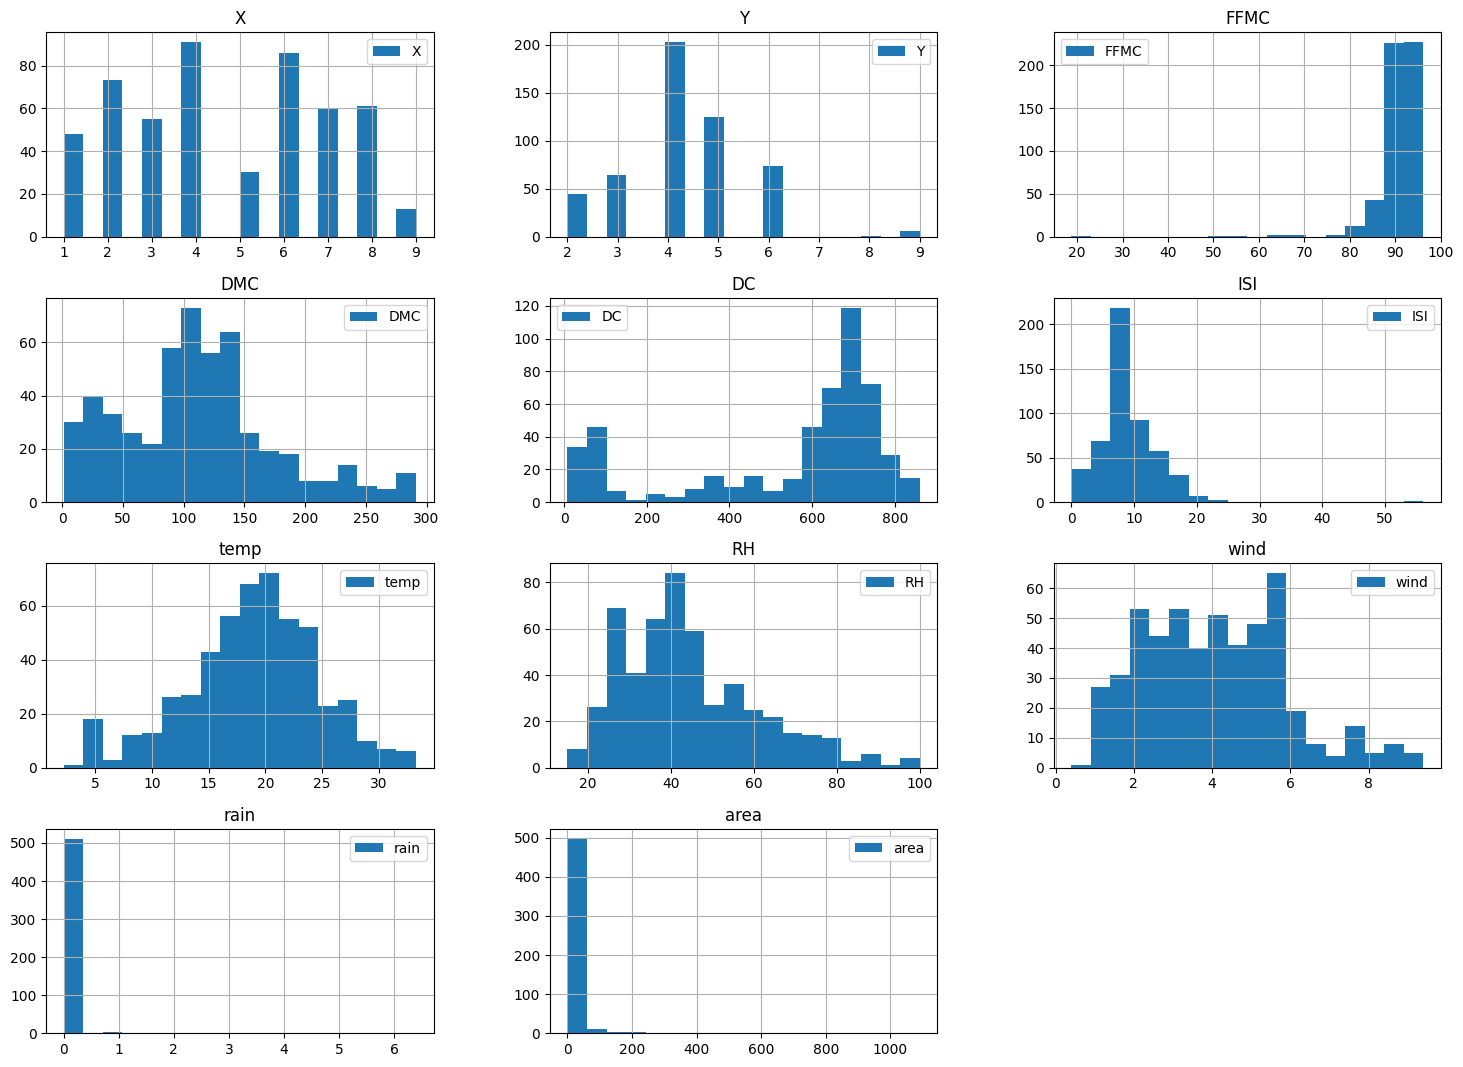

In [19]:
import matplotlib.pyplot as plt
plt1=plt.figure(figsize=(18,13))
a1=plt1.gca()
df.hist(ax=a1,bins=18, grid= "false", legend = "true")

* It can be observed that area data is skewed ..Let's analyse further

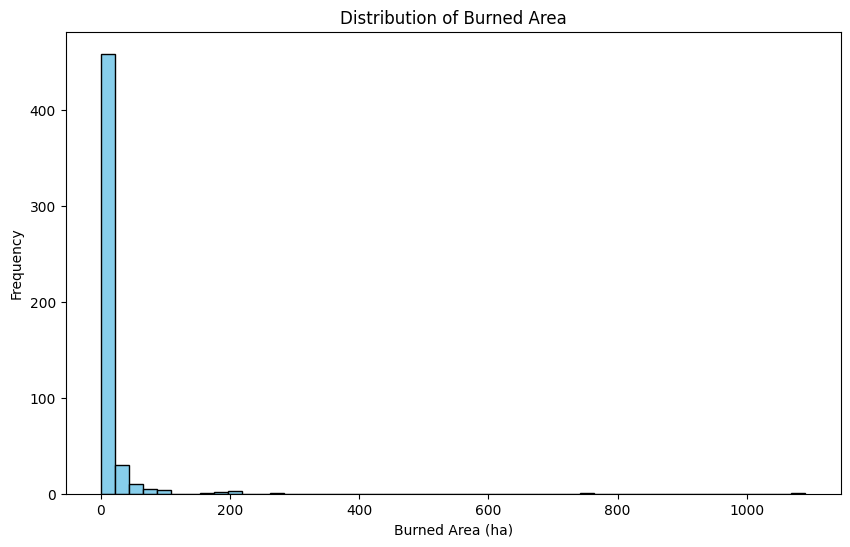

In [20]:


# Plot histogram of the 'area' column
plt.figure(figsize=(10,6))
plt.hist(df['area'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Burned Area')
plt.xlabel('Burned Area (ha)')
plt.ylabel('Frequency')
plt.show()

* The histogram of the 'area' variable indicates that the dataset is heavily skewed towards smaller values, with most of the burned area values being close to 0. This kind of distribution could potentially make the model training process challenging, as the model might have difficulties learning to predict larger areas due to the lack of examples in the data.

Now let's proceed with providing appropriate visualizations to get more insights about the dataset. For this, we can create scatter plots for numerical features against the 'area' variable and bar plots for categorical features.

For correlation analysis ,let's create a heatmap of the correlations between the variables. This will give us a visual representation of how each variable in the dataset is related to the others. The correlation can provide insights into which variables are strongly or weakly associated with each other, which can be useful for feature selection. Features that are highly correlated with the target variable might be good predictors, while features that are highly correlated with each other might carry similar information, and thus, some of them could potentially be removed to reduce dimensionality. Let's do this now.

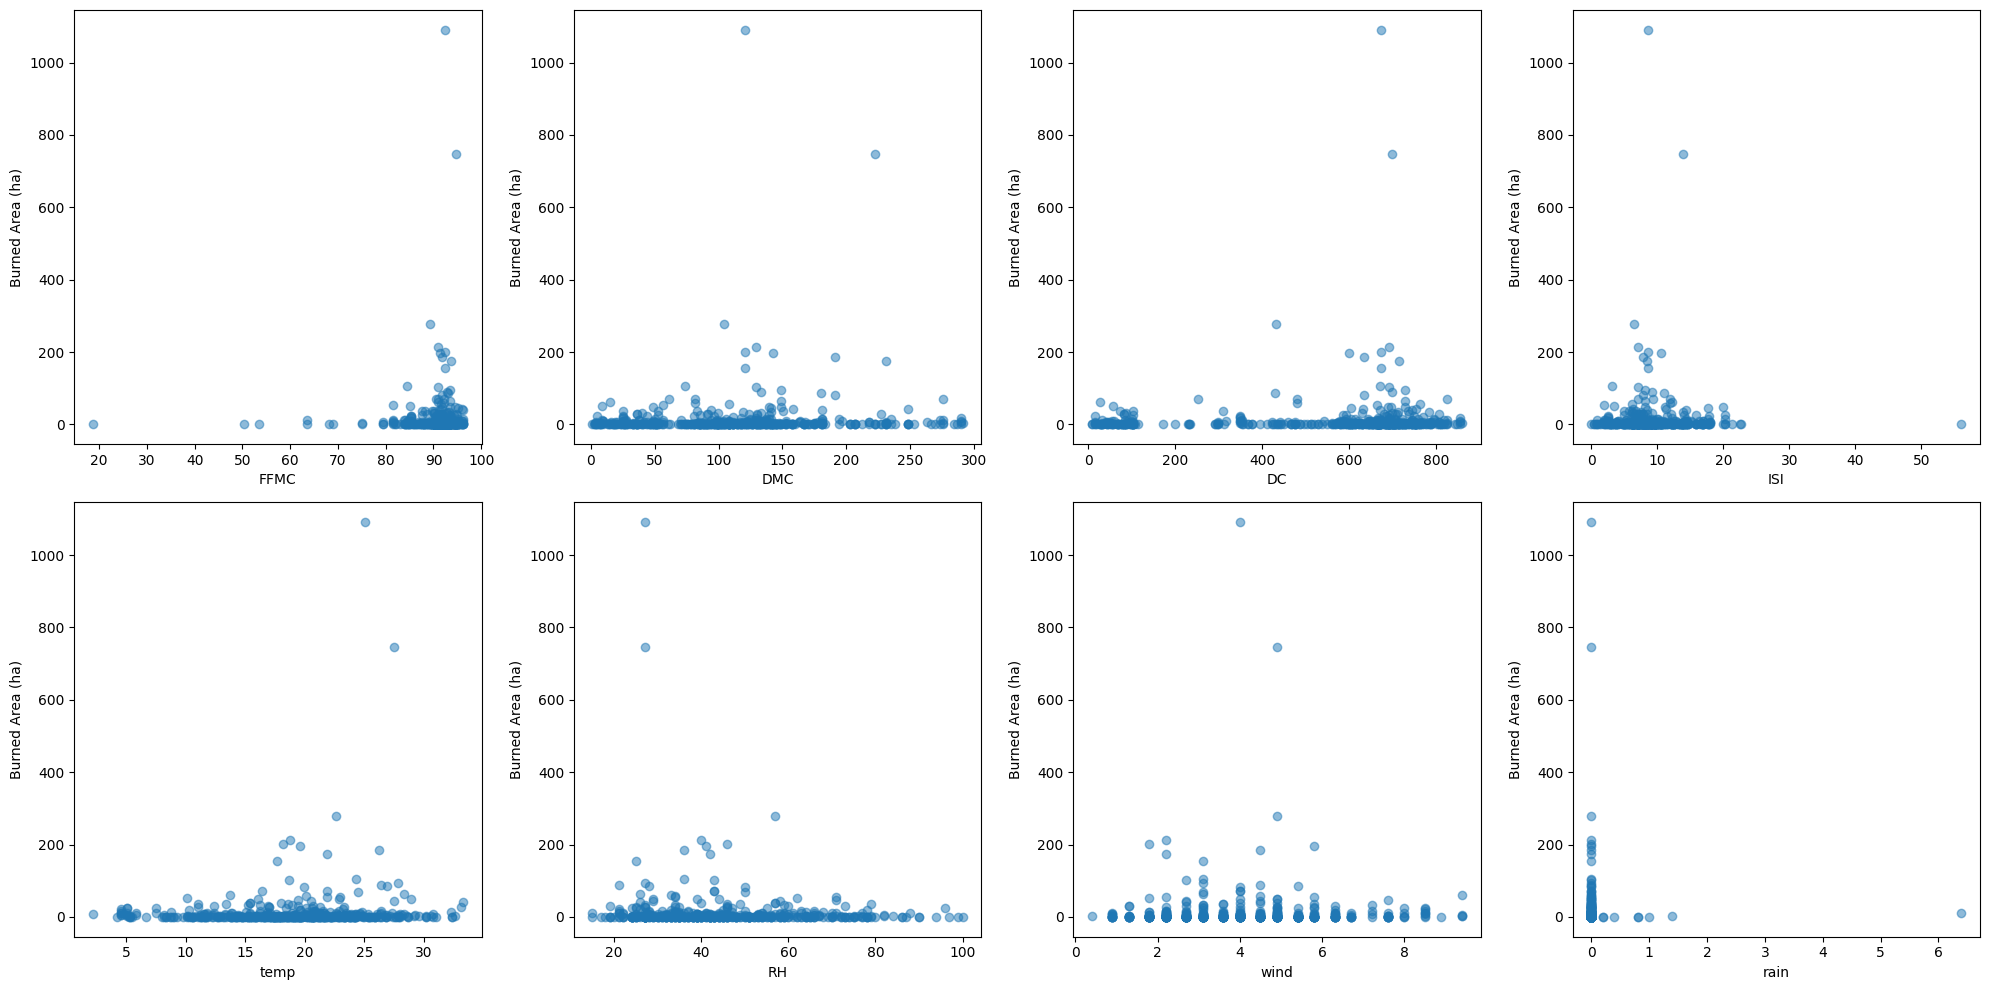

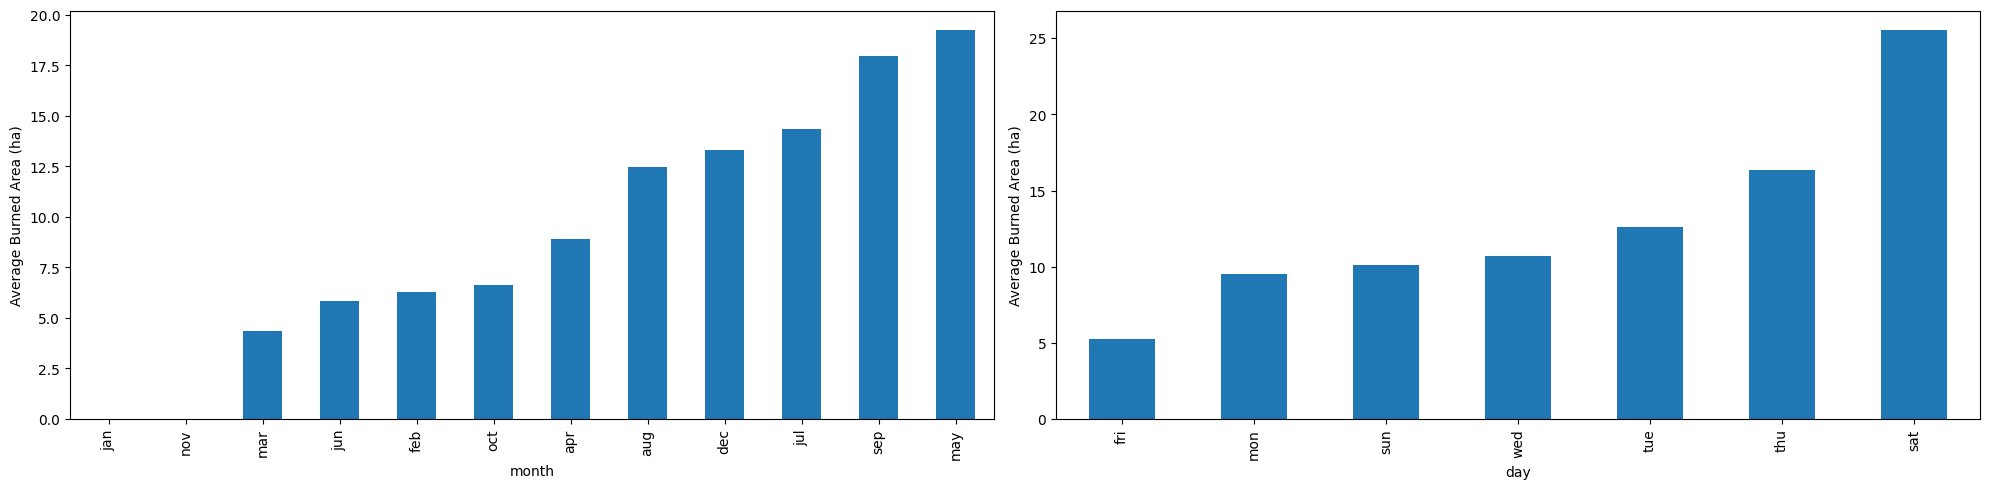

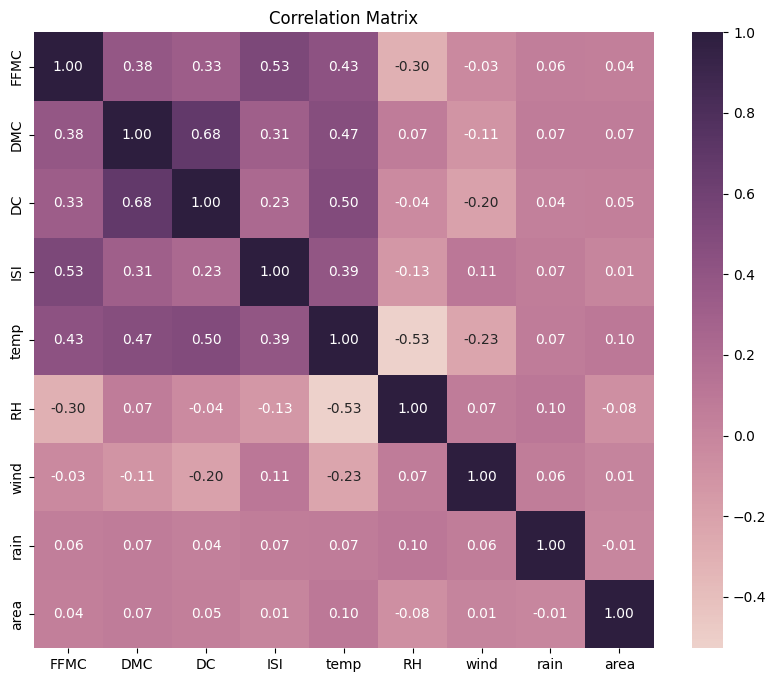

In [21]:
import seaborn as sns
import numpy as np

# Convert categorical columns to category data type
for col in ['month', 'day']:
    df[col] = df[col].astype('category')

# Display scatter plots for numerical features against the 'area' variable
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for ax, feature in zip(axs.flatten(), numerical_features):
    ax.scatter(df[feature], df['area'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('Burned Area (ha)')

plt.tight_layout()
plt.show()

# Display bar plots for categorical features
categorical_features = ['month', 'day']

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for ax, feature in zip(axs.flatten(), categorical_features):
    df.groupby(feature)['area'].mean().sort_values().plot(kind='bar', ax=ax)
    ax.set_ylabel('Average Burned Area (ha)')

plt.tight_layout()
plt.show()

# Display a heatmap of correlations between numerical variables
corr_matrix = df[numerical_features + ['area']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Justification

* The scatter plots for the numerical features show the relationship of each feature with the target variable 'area'. We can observe that none of the features exhibit a clear linear relationship with the 'area'. Some features like 'temp', 'DMC', and 'DC' seem to have a slightly positive correlation with 'area', but the relationships are not very strong.

* The bar plots for the categorical features 'month' and 'day' show the average burned area for each category. We can see some variations in the average burned area across different months and days, but it's hard to draw any definitive conclusions from these plots alone.

* The heatmap of the correlation matrix displays the correlation coefficients between the numerical variables. Correlation coefficients range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation. We can see from the heatmap that:

1. 'temp' and 'DMC' have the highest positive correlation with 'area' among the
features, though the correlation is still relatively weak.
2. 'rain' and 'RH' have a negative correlation with 'area', suggesting that higher rainfall or relative humidity might be associated with smaller burned areas.
3. 'DMC' and 'DC' are highly positively correlated with each other, which might indicate redundancy in the information they provide.
4. The insights from the correlational analysis can indeed influence feature selection. We might consider prioritizing features that have higher absolute correlation with the target variable 'area' as they might be more predictive. Also, when two features are highly correlated, we might consider removing one of them to reduce redundancy and the dimensionality of the dataset.

## Data Pre-processing and cleaning

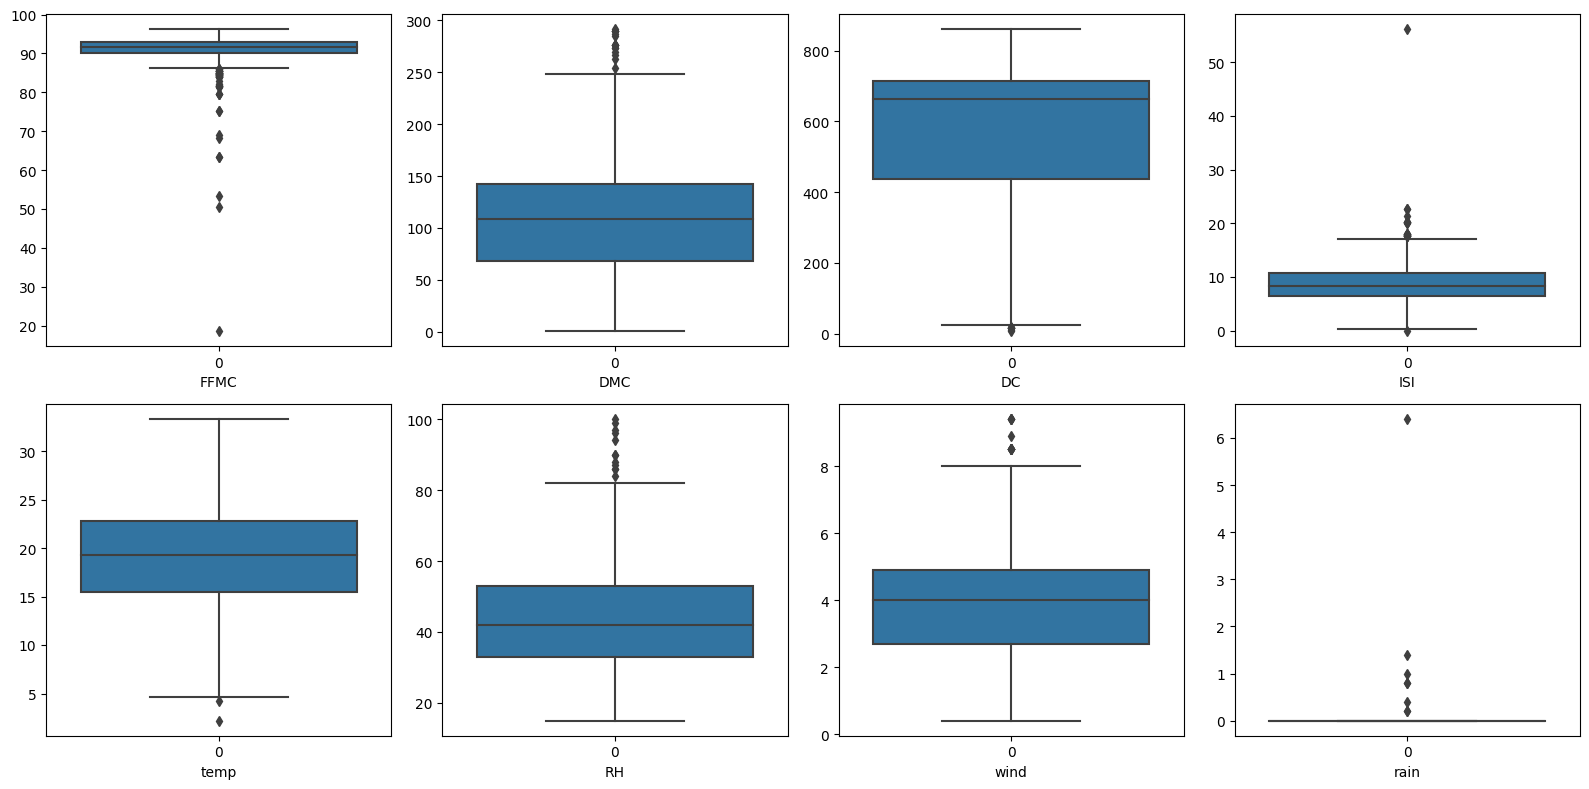

In [22]:
# Check for missing or null values
missing_values = df.isnull().sum()

# Identify potential outliers in numerical variables using box plots
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for ax, feature in zip(axs.flatten(), numerical_features):
    sns.boxplot(df[feature], ax=ax)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

### Inference from the analysis

* The dataset has no missing or null values, which is good news. The boxplots for the numerical features show that some features like `FFMC`, `ISI`, `rain`, and `area` have potential outliers as indicated by points beyond the whiskers of the boxplots. However, the confirmation depends on the domain knowledge.


## Preprocessing of Area data

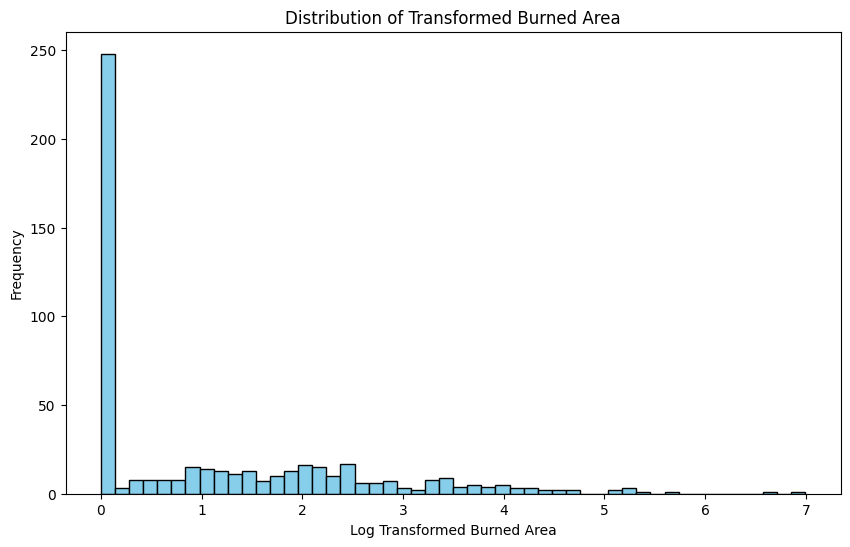

In [23]:
# Apply log transformation to 'area' after adding a constant
df['area_log1p'] = np.log1p(df['area'])

# Plot histogram of the transformed 'area' variable
plt.figure(figsize=(10,6))
plt.hist(df['area_log1p'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transformed Burned Area')
plt.xlabel('Log Transformed Burned Area')
plt.ylabel('Frequency')
plt.show()

### Justificaton
Since we can see that area data is skewed . We can reduce the ske by applying log transformation.
* Hence added log transformation to reduce the skewness of the `area` column.

## Normalising number valued columns and  Converting category columns in to numbers

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Function to create interaction features
def create_interaction(df):
    df['temp_RH'] = df['temp'] * df['RH']
    return df

# Create a pipeline for pre-processing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), ['month', 'day'])],
    remainder='passthrough')

# Combine preprocessor and feature creation in a pipeline
pipeline = Pipeline(steps=[
    ('interaction', FunctionTransformer(create_interaction)),
    ('preprocessor', preprocessor)])
# Apply the transformations
df_transformed = pipeline.fit_transform(df.drop(['area', 'area_log1p'], axis=1))



## Model Building


### Split the dataset into training and test sets and k fold validation
Now, let's split the dataset into training and testing sets with an 80-20 split and another split of your choice. We'll use the transformed dataset and 'area_log1p' as the target variable.

Also, we'll explore k-fold cross validation. In k-fold cross validation, the dataset is divided into k subsets. The model is trained on k-1 subsets and tested on the remaining subset. This process is repeated k times with each subset used as the test set once. This provides k estimates of the model's performance, which can then be averaged to get a more robust estimate.

Afterward, we'll build a model using linear regression, which is a simple and widely used algorithm for regression tasks. Let's proceed with these steps.

The dataset has been split into training and testing sets with two different ratios:

80-20 Split: This is a common split ratio that often provides a good balance between having enough data for training the model and having enough data for testing its performance on unseen data. The shapes of the training and testing sets confirm that 80% of the data is used for training and 20% is used for testing.

70-30 Split: This split ratio uses a larger proportion of the data for testing compared to the 80-20 split. This can provide a more robust estimate of the model's performance on unseen data, but it also leaves less data for training the model.

The 5-fold cross validation scores on the training set with the 80-20 split are displayed. These scores provide an estimate of the model's performance on different subsets of the training data. The scores are negative because the default scoring metric for regression in cross_val_score is the negative mean squared error, where lower values (closer to zero) are better. The average cross validation score is also negative, indicating that the linear regression model might not be performing very well on this dataset.

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Split the dataset into training and testing sets with an 80-20 split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_transformed, df['area_log1p'], test_size=0.2, random_state=42)

# Split the dataset into training and testing sets with a different split (70-30)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_transformed, df['area_log1p'], test_size=0.3, random_state=42)

# Display the shapes of the splits
print("80-20 Split:")
print("Train set - Features: ", X_train1.shape, "Target: ", y_train1.shape)
print("Test set - Features: ", X_test1.shape, "Target: ", y_test1.shape)
print("\n70-30 Split:")
print("Train set - Features: ", X_train2.shape, "Target: ", y_train2.shape)
print("Test set - Features: ", X_test2.shape, "Target: ", y_test2.shape)

# Create a Linear Regression model
model = LinearRegression()

# Perform 5-fold cross validation on the training set with the 80-20 split
scores = cross_val_score(model, X_train1, y_train1, cv=5)

# Display the cross validation scores
print("\nCross Validation Scores (5-fold): ", scores)
print("Average Cross Validation Score: ", scores.mean())


80-20 Split:
Train set - Features:  (413, 28) Target:  (413,)
Test set - Features:  (104, 28) Target:  (104,)

70-30 Split:
Train set - Features:  (361, 28) Target:  (361,)
Test set - Features:  (156, 28) Target:  (156,)

Cross Validation Scores (5-fold):  [-0.01973813 -0.17941256 -0.99637021 -0.09681112 -0.04568333]
Average Cross Validation Score:  -0.2676030708571566


## Model building



In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit the model on the training data (80-20 split)
model.fit(X_train1, y_train1)

# Predict on the test data
y_pred1 = model.predict(X_test1)

# Calculate and print the performance metrics
mse1 = mean_squared_error(y_test1, y_pred1)
mae1 = mean_absolute_error(y_test1, y_pred1)
r2_score1 = r2_score(y_test1, y_pred1)

print("Performance Metrics (80-20 Split):")
print("Mean Squared Error: ", mse1)
print("Mean Absolute Error: ", mae1)
print("r2: ", r2_score1)

# Fit the model on the training data (70-30 split)
model.fit(X_train2, y_train2)

# Predict on the test data
y_pred2 = model.predict(X_test2)

# Calculate and print the performance metrics
mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
r2_score1 = r2_score(y_test2, y_pred2)

print("\nPerformance Metrics (70-30 Split):")
print("Mean Squared Error: ", mse2)
print("Mean Absolute Error: ", mae2)
print("r2: ", r2_score1)


Performance Metrics (80-20 Split):
Mean Squared Error:  2.3014609840426
Mean Absolute Error:  1.2020148345678017
r2:  -0.04713645887873352

Performance Metrics (70-30 Split):
Mean Squared Error:  2.0588800973332413
Mean Absolute Error:  1.1579229404442992
r2:  -0.059736423735360145


### Prediction for the test data

In [30]:
# Predict on the training data (80-20 split)
y_pred_train1 = model.predict(X_train1)

# Calculate and print the performance metrics for the training data
mse_train1 = mean_squared_error(y_train1, y_pred_train1)
mae_train1 = mean_absolute_error(y_train1, y_pred_train1)
r2_score1 = r2_score(y_test1, y_pred1)

print("Performance Metrics on Training Data (80-20 Split):")
print("Mean Squared Error: ", mse_train1)
print("Mean Absolute Error: ", mae_train1)
print("r2: ", r2_score1)

# Predict on the training data (70-30 split)
y_pred_train2 = model.predict(X_train2)

# Calculate and print the performance metrics for the training data
mse_train2 = mean_squared_error(y_train2, y_pred_train2)
mae_train2 = mean_absolute_error(y_train2, y_pred_train2)
r2_score2 = r2_score(y_test2, y_pred2)

print("\nPerformance Metrics on Training Data (70-30 Split):")
print("Mean Squared Error: ", mse_train2)
print("Mean Absolute Error: ", mae_train2)
print("r2: ", r2_score2)

# Display the results of the predictions on the test data (80-20 split)
results1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
results1 = results1.reset_index(drop=True)

# Display the results of the predictions on the test data (70-30 split)
results2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
results2 = results2.reset_index(drop=True)

results1.head(10), results2.head(10)


Performance Metrics on Training Data (80-20 Split):
Mean Squared Error:  1.7454173956972845
Mean Absolute Error:  1.0747362774012352
r2:  -0.04713645887873352

Performance Metrics on Training Data (70-30 Split):
Mean Squared Error:  1.7781794316888462
Mean Absolute Error:  1.079824454323282
r2:  -0.059736423735360145


(     Actual  Predicted
 0  0.000000   3.918607
 1  0.000000   1.501906
 2  0.802002   1.481141
 3  0.900161   1.054767
 4  1.081805   0.759699
 5  0.000000   0.771877
 6  2.707383   1.112979
 7  2.006871   0.416333
 8  0.000000   1.209304
 9  0.559616   0.811069,
      Actual  Predicted
 0  0.000000   4.211313
 1  0.000000   1.628106
 2  0.802002   1.505531
 3  0.900161   1.207635
 4  1.081805   0.674276
 5  0.000000   0.855639
 6  2.707383   1.255905
 7  2.006871   0.330347
 8  0.000000   1.160478
 9  0.559616   0.823247)

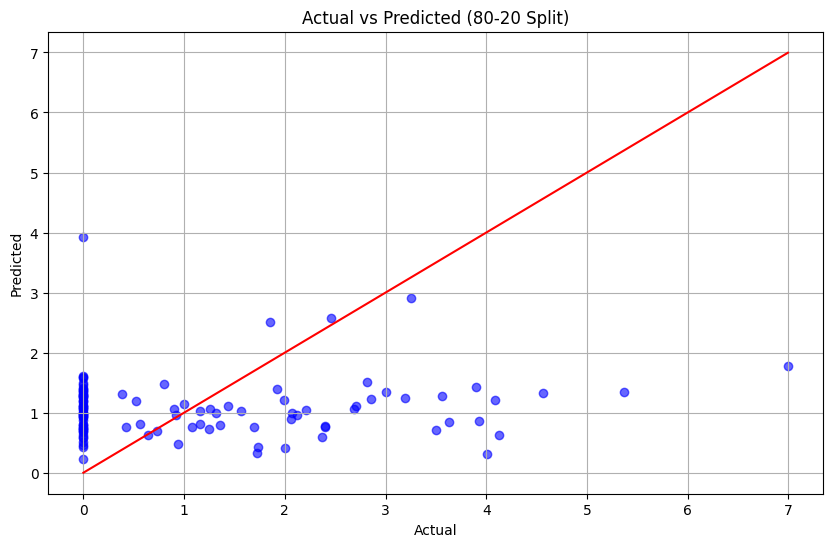

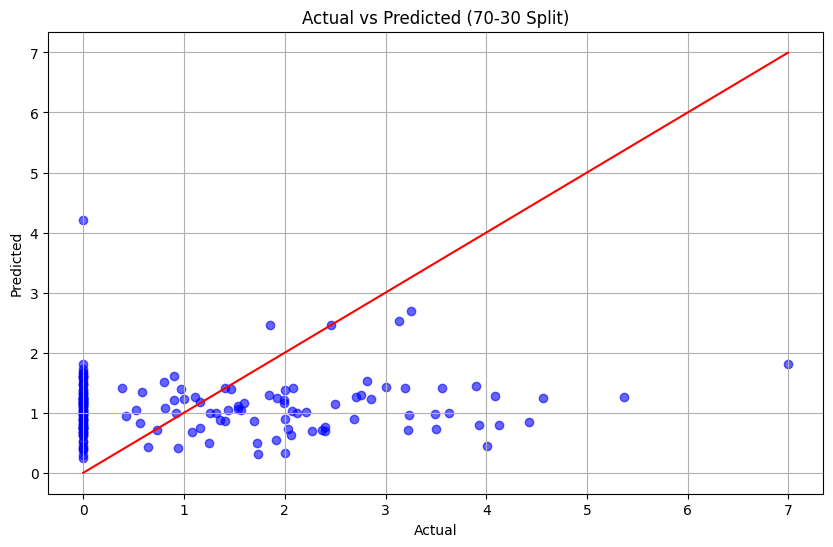

In [31]:
# Plotting predicted vs actual values for the 80-20 split
plt.figure(figsize=(10,6))
plt.scatter(y_test1, y_pred1, color='blue', alpha=0.6)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red') # A red line representing perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (80-20 Split)')
plt.grid(True)
plt.show()

# Plotting predicted vs actual values for the 70-30 split
plt.figure(figsize=(10,6))
plt.scatter(y_test2, y_pred2, color='blue', alpha=0.6)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red') # A red line representing perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (70-30 Split)')
plt.grid(True)
plt.show()

## Comments on the results

The performance metrics on the training data for both split ratios are as follows:

###80-20 Split:

* Mean Squared Error: 1.75
* Mean Absolute Error: 1.07

###70-30 Split:

* Mean Squared Error: 1.78
* Mean Absolute Error: 1.08

These metrics are similar to the performance metrics on the test data, which suggests that the model is not overfitting or underfitting the data. Overfitting would be indicated by a much lower error on the training data compared to the test data, as it would mean the model has learned the training data too well and does not generalize well to unseen data. Underfitting would be indicated by a high error on both the training and test data, as it would mean the model has not learned the data well enough.

The first 10 rows of the results of the predictions on the test data for both split ratios are displayed. Each row shows the actual value and the predicted value of the 'area_log1p' variable.

From the results, we can see that the model's predictions are not very accurate. The model seems to overestimate the 'area_log1p' for many instances where the actual value is 0. This is likely due to the skewness in the 'area_log1p' distribution and the fact that many of the features do not have a strong linear relationship with 'area_log1p'. This suggests that linear regression might not be the best model for this dataset, and a more complex model that can capture non-linear relationships might perform better.

In conclusion, while the linear regression model is neither overfitting nor underfitting the data, its performance is not very high. This suggests that the model is "just right" in terms of complexity, but the linear regression assumptions might not hold for this dataset. More complex models or further feature engineering might be needed to improve the performance.

### Optimisation

The model can be further optimised by dropping features like `month`, `day`, `FFMC`.